In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [2]:
%autosave 0

Autosave disabled


In [3]:
# Tarea: Taxi

#En grupos de tres estudiantes resuelvan el ambiente ["Taxi-v3"](https://gym.openai.com/envs/Taxi-v3/)


#- Describa detalladamente el ambiente (estados posibles, acciones posibles, recompensas, etc)
#- Utilice $\epsilon$ greedy Q-learning para entrenar un agente que resuelva el problema
#- Muestre en una gráfica la evolución de la recompensa promedio de su agente
#Describa el algoritmo de ϵ
#greedy Q-learning y sus parámetros
#Utilice ϵ greedy Q-learning para entrenar un agente que resuelva el problema, indique la mejor configuración de parámetros que encontró para este problema
#Muestre la tabla Q, escoja 4 estados y razone sobre los resultados obtenidos
#Muestre en una gráfica la evolución de la recompensa promedio de su agente y el número de pasos promedios
#Grabe un video o una animación de su agente ejecutando la tarea 5 veces


from gym import wrappers
import matplotlib.pyplot as plt
%matplotlib inline
import gym 

env = gym.make("Taxi-v3")
env = wrappers.Monitor(env, './video', video_callable=lambda episode_id: True,force=True)
env.reset()
env.render()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



# Descripción

   **Descripción:**
    Hay cuatro lugares designados en la grilla indicados por (R, G, Y y B). Cuando el episodio comienzsa, el taxi comienza desde una esquina aleatoria y el pasajero está en otro cuadro aleatorio. El taxi conduce hacia la ubicación del pasajero, lo toma y conduce hacia el destino del pasajero (alguna otra de las cuatro esquinas) y luego lo deja. Una vez que deja al pasajero, el episodio termina.


### Descripción de Ambiente

**Observaciones:**
   Hay un espacio discreto de 500 estados; 
   ## ya que hay 25 posiciones para el taxi.
   
   ### 5 posibles ubicaciones del pasajero (incluyendo el caso cuando el pasajero está en el Taxi):
   - 0: R (red -> rojo)
   - 1: G (green -> verde)
   - 2: Y (yellow -> amarillo)
   - 3: B (blue -> azul)
   - 4: En taxi
   ### 4 destinos:
   - 0: R (red -> rojo)
   - 1: G (green -> verde)
   - 2: Y (yellow -> amarillo)
   - 3: B (blue -> azul)
   

##### R: Estados posibles 500

In [4]:
# Espacio de estados
display(env.observation_space)
display(env.observation_space.n)

Discrete(500)

500

##### R Acciones posee 6 acciones deterministas
 **Acciones:**
    Hay 6 acciones deterministicas:
   - 0: mover al Sur
   - 1: mover al norte
   - 2: mover al Este
   - 3: mover al Oeste
   - 4: Tomar pasajero
   - 5: Dejar pasajero

In [5]:
# Espacio de acciones
display(env.action_space)
display(env.action_space.n)

Discrete(6)

6

##### R Recompensas de cada acción:
       * -1 por cada acción, +20 por cada pasajero en viaje
       *-10 por acciones de subir y bajar ilegalmente.

In [6]:
display(env.P)

{0: {0: [(1.0, 100, -1, False)],
  1: [(1.0, 0, -1, False)],
  2: [(1.0, 20, -1, False)],
  3: [(1.0, 0, -1, False)],
  4: [(1.0, 16, -1, False)],
  5: [(1.0, 0, -10, False)]},
 1: {0: [(1.0, 101, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 21, -1, False)],
  3: [(1.0, 1, -1, False)],
  4: [(1.0, 17, -1, False)],
  5: [(1.0, 1, -10, False)]},
 2: {0: [(1.0, 102, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 22, -1, False)],
  3: [(1.0, 2, -1, False)],
  4: [(1.0, 18, -1, False)],
  5: [(1.0, 2, -10, False)]},
 3: {0: [(1.0, 103, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 23, -1, False)],
  3: [(1.0, 3, -1, False)],
  4: [(1.0, 19, -1, False)],
  5: [(1.0, 3, -10, False)]},
 4: {0: [(1.0, 104, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 24, -1, False)],
  3: [(1.0, 4, -1, False)],
  4: [(1.0, 4, -10, False)],
  5: [(1.0, 4, -10, False)]},
 5: {0: [(1.0, 105, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 25, -1, False)],
  3: [(1.0, 5, -1, False)

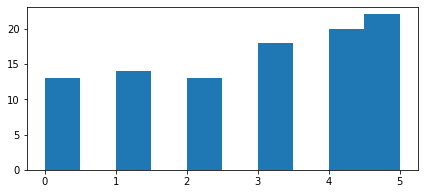

In [7]:
import numpy as np
a = []
for i in range(100):
    a.append(env.action_space.sample())

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
plt.hist(np.array(a));

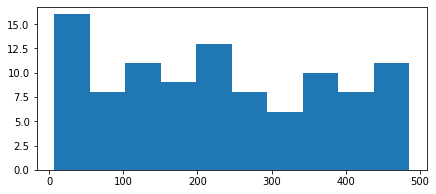

In [8]:
env = gym.make("Taxi-v3")
arrival_state = []
rewards = []
for k in range(100):
    env.reset()
    paso =  env.action_space.sample()
    s, r, end, info = env.step(paso)
    arrival_state.append(s) #enlisto los estados
    rewards.append(r)  #enlisto las recompensas por estado

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
plt.hist(np.array(arrival_state));

En la gráfica nos logra figurar la cantidad de veces que realiza ciertos estados en órdenes aleatorios solo estocásticamente, cuales nos permite tener una gran variedad de posiblidades en espacios de estados para acciones.

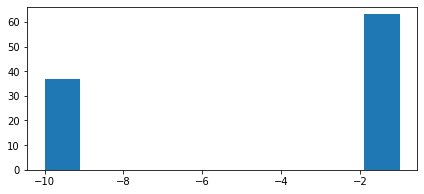

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
plt.hist(np.array(rewards));

Gráfica que nos muestra el comportamiento de las recompensas obtenidas a través de las interacciones, o que nos indica que sólo toma pasajeros y bajadas ilegales, dejando fuera el pasajero a bordo del taxi que deje la bonificación más relevante o proceso como tal de un taxi de llevar pasajeros.

In [10]:
from IPython.display import clear_output
from time import sleep
import gym

env = gym.make("Taxi-v3")
env.reset()
end = False
step = 0

while not end:
    a = env.action_space.sample()
    s, r, end, info = env.step(a)
    clear_output(wait=True)
    print(step)
    print(r)
    print(env.render(mode='ansi'))    
    sleep(.1)
    step += 1

199
-10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)



Según las gráfica anteriores, sumado con el comportamiento, nos dice que para encontrar la solución óptima de recorridos con pasajeros, necesita 200 ciclos para su solución la cual a pesar de ser estocásticas determinan un resultado fijo

# Usando QLearning

In [21]:
import numpy as np
import gym
from tqdm.notebook import tqdm

env = gym.make("Taxi-v3")

arrival_state = []
rewards = []
alpha = 0.1
gamma = 0.99
Q = np.zeros(shape=(env.observation_space.n, env.action_space.n))

for episode in tqdm(range(1000)):
    env.reset()
    
    end = False    
    while not end:  
        s_current = env.s
        
        # Escoger la mejor acción
        a = np.argmax(Q[s_current, :]) 
        
        # Ejecutarla
        s_future, r, end, info = env.step(a)
        
        # Actualizar Q
        Q[s_current, a] += alpha*(r + gamma*np.max(Q[s_future, :]) - Q[s_current, a])
    print(env.render(mode='ansi')) 
    sleep(.1)
    rewards.append(r)
    arrival_state.append(a)

Widget Javascript not detected.  It may not be installed or enabled properly.


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| |_: | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | :

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y|_: |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | :_| : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : :

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)




<IPython.core.display.Javascript object>


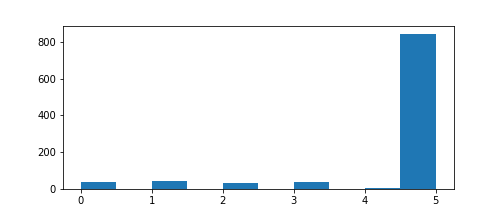

<IPython.core.display.Javascript object>


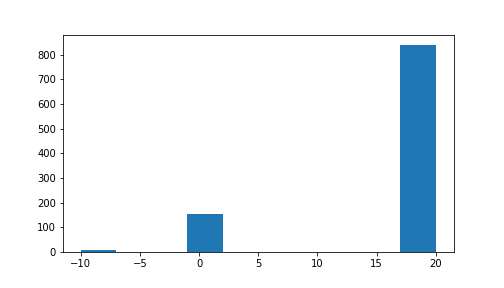

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
plt.hist(np.array(arrival_state));
plt.figure(figsize=(7, 4))
plt.hist(np.array(rewards));

Basado en los gráfico podemos obtener direccionamientos distintos por sobre los estados anteriores, indicandonos que las acciones del taxi dejan pasajeros efectivamente basándonos en las recompensas obtenidas, pero aún así no las más óptimas, pero si considerables para 1000 observaciones, lo que podremos decir ademas que por los datos recurre a la explotación cual no es muy efectiva. Además decimos que basados en la cantidad de estados observados, la estocacidad se reduce drásticamente, ya que en el recorrido del taxi busca la mejor ruta cual buscar pasajeros y los entrega, pero aún así no nos posibilita ver si se produce alguna penalización por taxi completo.

In [23]:
display(Q)
from collections import Counter
display(Counter(rewards));

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.64245024e+00, -3.63417044e+00, -3.68613457e+00,
        -3.63417044e+00,  2.40945296e+00, -3.99400400e+00],
       [-2.16727089e+00, -2.17705327e+00, -2.18764521e+00,
        -2.17705327e+00,  1.27956543e+01, -2.99700100e+00],
       ...,
       [-1.19342195e+00, -1.15120307e+00, -1.19342195e+00,
        -1.22719742e+00, -1.99900000e+00, -1.99900000e+00],
       [-2.37260134e+00, -2.33410290e+00, -2.37260134e+00,
        -2.40307335e+00, -2.99700100e+00, -2.99700100e+00],
       [-1.99900000e-01, -1.99900000e-01, -1.99900000e-01,
         8.00000000e-03, -1.00000000e+00, -1.00000000e+00]])

Counter({-10: 9, -1: 152, 20: 839})

falta refinar análsiis sobre éstos resultados, se debe revisar el video de la clase de QLearning

### Definimos el valor de Epsilon

<IPython.core.display.Javascript object>


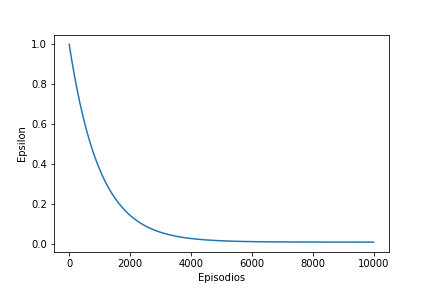

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4))
episodes = np.arange(10000)
epsilon_init = 1.0
epsilon_end = 0.01
epsilon_rate = 1e-3
ax.plot(episodes, epsilon_end + (epsilon_init - epsilon_end) * np.exp(-epsilon_rate*episodes));
ax.set_xlabel('Episodios')
ax.set_ylabel('Epsilon');

<IPython.core.display.Javascript object>


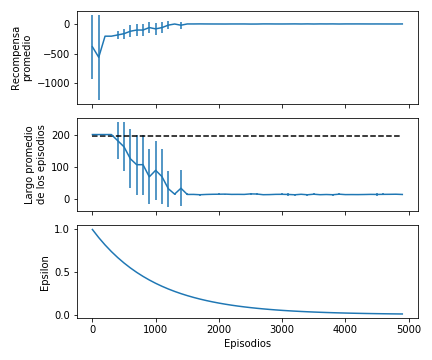

In [43]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, figsize=(6, 5), sharex=True, tight_layout=True)

def update_plot():
    for ax_ in ax:
        ax_.cla()
    
    episodes = np.arange((episode+1)//100)*100
    ax[0].errorbar(episodes,
                   np.array(diagnostics['rewards']).mean(axis=1), 
                   np.array(diagnostics['rewards']).std(axis=1));
    ax[0].set_ylabel('Recompensa\npromedio');
    ax[1].errorbar(episodes,
                   np.array(diagnostics['episode_length']).mean(axis=1), 
                   np.array(diagnostics['episode_length']).std(axis=1));
    ax[1].plot(episodes, [195]*len(episodes), 'k--')
    ax[1].set_ylabel('Largo promedio\nde los episodios');
    ax[2].plot(episodes, epsilon(episodes))
    ax[2].set_ylabel('Epsilon')
    ax[2].set_xlabel('Episodios')
    fig.canvas.draw()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm.notebook import tqdm

env = gym.make("Taxi-v3")
Q = np.zeros(shape=(env.observation_space.n, env.action_space.n))

diagnostics = {'rewards': [], 'episode_length': []}
# Parametros
alpha = lambda episode: 0.1
gamma = 0.999
epsilon_init = 1.0 # NUEVO
epsilon_end = 0.01 # NUEVO
epsilon_rate = 1e-3 # NUEVO
epsilon = lambda episode : epsilon_end + (epsilon_init - epsilon_end) * np.exp(-epsilon_rate*episode) # NUEVO

for episode in tqdm(range(5000)):
    env.reset()
    end = False
    # Entrenamiento
    while not end:        
        s_current = env.s
        
        # Seleccionar la acción
        if not np.random.binomial(1, p=1.-epsilon(episode)) and ~np.all(Q[s_current]==0): 
            a = np.argmax(Q[s_current])  
        else:
            a = env.action_space.sample() 
        # Ejecutarla
        s, r, end, info = env.step(a)
        s_future = s # NUEVO
        # Actualizar Q
        Q[s_current][a] += alpha(episode)*(r + gamma*np.max(Q[s_future]) - Q[s_current][a]) 
       

    # Prueba
    # Cada 100 epocas evaluamos nuestro agente
    if np.mod(episode+1, 100) == 0:
        diagnostics['rewards'].append(np.zeros(shape=(10,)))
        diagnostics['episode_length'].append(np.zeros(shape=(10,)))
        for k in range(10):
            env.reset()    
            end = False
            episode_length = 0
            episode_reward = 0.0
            while not end:        
                s_current = env.s
                a = np.argmax(Q[s_current, :])  
                s_future, r, end, info = env.step(a)
                episode_length += 1
                episode_reward += r
            
            diagnostics['rewards'][-1][k] = episode_reward
            diagnostics['episode_length'][-1][k] = episode_length
        update_plot()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [38]:
np.set_printoptions(precision=3)    
display(Q)
display(np.arange(16).reshape(4, 4))
movs = np.ones(9).reshape(3, 3)*-1
movs[0, 1] = 3
movs[1, 0] = 0
movs[1, 2] = 2
movs[2, 1] = 1
display(movs)
env.render()

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.586,  0.46 , -0.586,  0.46 ,  1.623, -8.54 ],
       [ 4.349,  5.943,  4.349,  5.943,  7.715, -3.057],
       ...,
       [ 7.715,  9.683,  7.714,  5.943, -1.286, -1.285],
       [ 1.623,  2.914,  1.623,  2.914, -7.377, -7.377],
       [14.298, 11.87 , 14.3  , 17.   ,  5.3  ,  5.299]])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[-1.,  3., -1.],
       [ 0., -1.,  2.],
       [-1.,  1., -1.]])

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


Basado en los datos anterior mente usando un epsilon 10⁻3, gamma = 0.9 y alpha=0.9 el promedio de recompensas demra en tomar valores convergentes donde se produce exploracion hasta los 2000 episodios, en comparación de solo cambiar el gamma=0.999 la convergencia en los valores de exploracion se reduce a 1500 aprox,donde entregamos mejor preferencia a los espacios de búsqueda en explorar antes de explotar.

basado en la matriz de recompensas, se logra ver q obviamente tenemos los estados iniciales son 0, y que van incrementandose con el tiempo, ahora durante las mejores opciones, en la etapa final de entrenamiento, nos dice que es mejor cuando se mueve al sur, este y oeste, indicando que son las mejores opciones al finalizar el proceso.